In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

(236, 236, 3)
(236, 236)


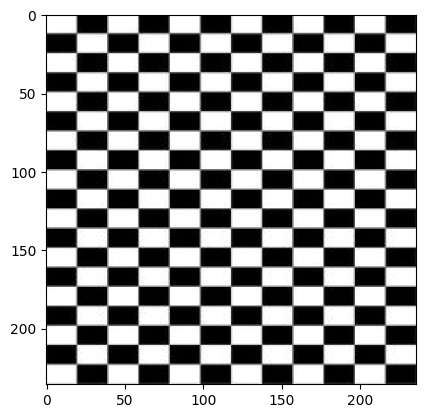

In [41]:
img = plt.imread('46f350c9cc4bca640c178892ddc99e0e.jpg')
print(img.shape)
img = np.dot(img[...,:3],[0.2989,0.5870,0.1140])
print(img.shape)

plt.imshow(img, cmap='gray')

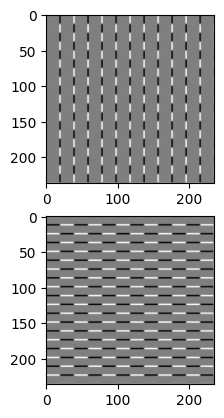

In [42]:
def normalize(sobel_image):
    max_value = np.max(sobel_image)
    min_value = np.min(sobel_image)
    normalized_image = (sobel_image - min_value) *255 / (max_value - min_value)
    normalized_image = normalized_image.astype('uint32')
    return normalized_image

def x_sobel(img):
    img2 = img.copy()
    x_sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    for row in range(1, img.shape[0] - 1):
        for col in range(1, img.shape[1] - 1):
            img2[row,col] =np.sum(img[row-1:row+2,col-1:col+2]*x_sobel)
    # img2 = normalize(img2)
    return img2

def y_sobel(img):
    img2 = img.copy()
    y_sobel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    for row in range(1, img.shape[0] - 1):
        for col in range(1, img.shape[1] - 1):
            img2[row,col] =np.sum(img[row-1:row+2,col-1:col+2]*y_sobel)
    # img2 = normalize(img2)
    return img2

plt.subplot(211)
plt.imshow(normalize(x_sobel(img)), cmap='gray')
plt.subplot(212)
plt.imshow(normalize(y_sobel(img)), cmap='gray')

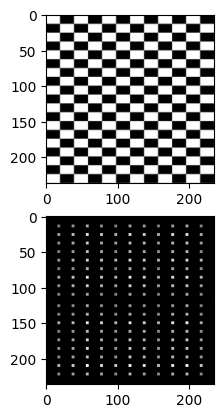

In [43]:
# Harris corner detection
def corner_detection(img):
    black = np.zeros((236,236))
    Ix = x_sobel(img)
    Iy = y_sobel(img)
    R_list = []
    for r in np.arange(0,len(img),4):
        for c in np.arange(0,len(img),4):
            Ix_patch = Ix[r:r+4,c:c+4]
            Iy_patch = Iy[r:r+4,c:c+4]
            A = np.array([[np.sum(Ix_patch**2),        np.sum(Ix_patch*Iy_patch)],
                        [np.sum(Ix_patch*Iy_patch),  np.sum(Iy_patch**2)]])
            R = np.linalg.det(A) - 0.06*(np.trace(A)**2)
            R_list.append(R)

    for i in range(len(R_list)):
        if R_list[i] < 0: R_list[i] = 0

    R_max = np.max(R_list)
    R_min = np.min(R_list)
    i = 0
    for r in np.arange(0,len(img),4):
        for c in np.arange(0,len(img),4): #R có index chạy theo đúng thứ tự
            intensity = (R_list[i] - R_min) *255 / (R_max - R_min)
            i+=1
            black[r:r+4,c:c+4] = intensity

    for r in np.arange(0,len(black),4):
        for c in np.arange(0,len(black),4):
            kernel = black[r-8:r+8,c-8:c+8]
            if kernel.size != 0:
                if np.max(black[r:r+4,c:c+4]) == np.max(kernel): pass
                else: black[r:r+4,c:c+4] = 0
            else:
                if np.max(black[r:r+4,c:c+4]) < 200: black[r:r+4,c:c+4] = 0
                #xử lý đoạn ngoài của ảnh vì không dùng padding 
    return black
    
plt.subplot(211)
plt.imshow(img, cmap='gray')
plt.subplot(212)
plt.imshow(corner_detection(img), cmap='gray')


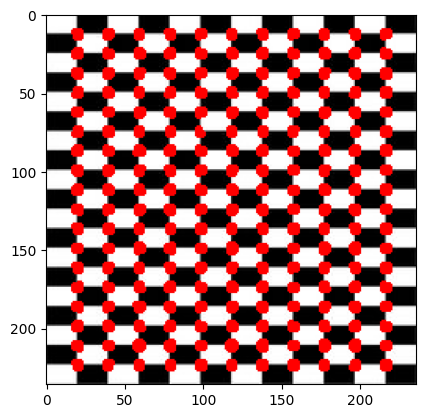

In [44]:
#Test and compare with cornerHarris function in cv2
img = cv.imread('46f350c9cc4bca640c178892ddc99e0e.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
corners = cv.cornerHarris(gray, 4, 3, 0.06)
cv.normalize(corners, corners, 0, 1, cv.NORM_MINMAX)

# Draw circles around the detected corners
for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i,j] > 0.6:
            cv.circle(img, (j,i), 1, (255,0,0), 2)

plt.imshow(img)
